In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import re

In [2]:
df = pd.read_csv("/kaggle/input/emotions-in-text/Emotion_final.csv")
df.head()

,Text,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21459 entries, 0 to 21458
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Text     21459 non-null  object
 1   Emotion  21459 non-null  object
dtypes: object(2)
memory usage: 335.4+ KB


<AxesSubplot:xlabel='Emotion', ylabel='count'>

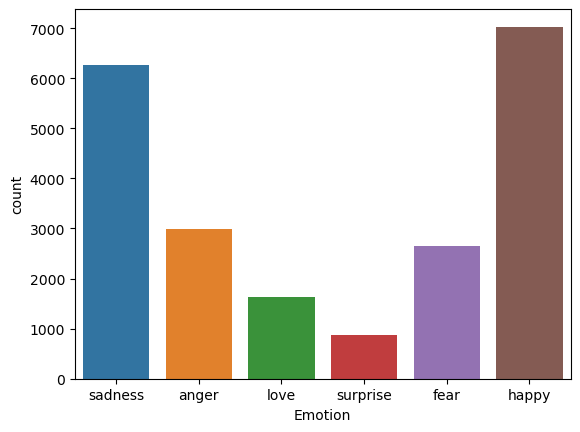

In [4]:
sns.countplot(x="Emotion", data=df)

In [5]:
#lower text
df["Text"] = df["Text"].str.lower()

In [6]:
#removal of punctuation
def remove_punctuation(text):
  return re.sub(r'[^\w\s]', '', text)
  
df["Text"] = df["Text"].apply(lambda text: remove_punctuation(text))

In [7]:
#removal of stopwords
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
", ".join(stopwords.words('english'))

STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

df["Text"] = df["Text"].apply(lambda text: remove_stopwords(text))

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
# removal of frequent words
from collections import Counter
cnt = Counter()
for text in df["Text"].values:
    for word in text.split():
        cnt[word] += 1
        
print(cnt.most_common(10))

FREQWORDS = set([w for (w, wc) in cnt.most_common(10)])
def remove_freqwords(text):
    return " ".join([word for word in str(text).split() if word not in FREQWORDS])

df["Text"] = df["Text"].apply(lambda text: remove_freqwords(text))

[('feel', 13973), ('feeling', 6461), ('like', 3659), ('im', 3055), ('really', 1201), ('know', 1091), ('time', 1031), ('little', 960), ('get', 947), ('people', 865)]


In [9]:
# removal of rare words
n_rare_words = 10
RAREWORDS = set([w for (w, wc) in cnt.most_common()[:-n_rare_words-1:-1]])
def remove_rarewords(text):
    return " ".join([word for word in str(text).split() if word not in RAREWORDS])
df["Text"] = df["Text"].apply(lambda text: remove_rarewords(text))

In [10]:
df["Text"]

0                                         didnt humiliated
1        go hopeless damned hopeful around someone care...
2                        grabbing minute post greedy wrong
3                  ever nostalgic fireplace still property
4                                                  grouchy
                               ...                        
21454                                   stared friend dism
21455                state elections seen parties dismayed
21456                             vincent irritated dismay
21457                            turned back face dismayed
21458                                             dismayed
Name: Text, Length: 21459, dtype: object

In [11]:
!unzip /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/

Archive:  /usr/share/nltk_data/corpora/wordnet.zip
   creating: /usr/share/nltk_data/corpora/wordnet/
  inflating: /usr/share/nltk_data/corpora/wordnet/lexnames  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adv  
  inflating: /usr/share/nltk_data/corpora/wordnet/adv.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/cntlist.rev  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.adj  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adj  
  inflating: /usr/share/nltk_data/corpora/wordnet/LICENSE  
  inflating: /usr/share/nltk_data/corpora/wordnet/citation.bib  
  inflating: /usr/share/nltk_data/corpora/wordnet/noun.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/verb.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/README  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.sense  
  inflating: /usr/share/nltk_data

In [12]:
from nltk.stem import WordNetLemmatizer

w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    return " ".join(list([lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]))


df['Text'] = df["Text"].apply(lemmatize_text)

In [13]:
df.head()

,Text,Emotion
0,didnt humiliated,sadness
1,go hopeless damned hopeful around someone care...,sadness
2,grabbing minute post greedy wrong,anger
3,ever nostalgic fireplace still property,love
4,grouchy,anger


In [14]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

all_features = vectorizer.fit_transform(df.Text)

In [15]:
all_features.shape

(21459, 17139)

In [16]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y = encoder.fit_transform(np.array(df.Emotion).reshape(-1,1))

/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<AxesSubplot:xlabel='Emotion', ylabel='count'>

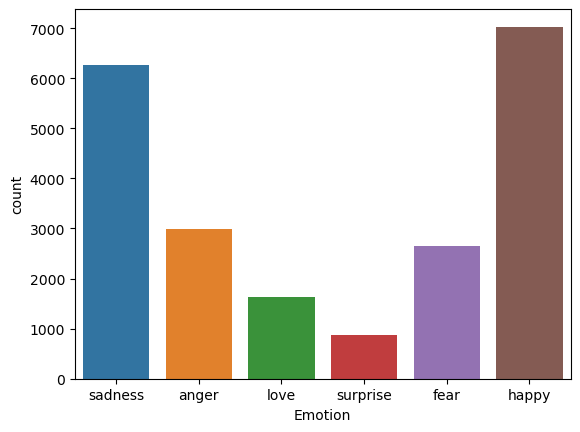

In [17]:
sns.countplot(x="Emotion", data=df)

In [18]:
["anger", "fear", "happy", "love", "sadness", "surprise"]

['anger', 'fear', 'happy', 'love', 'sadness', 'surprise']

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(all_features, y, test_size=0.1, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, stratify=y_train)

In [20]:
X_train.shape

(17381, 17139)

In [21]:
import time

In [22]:
# Navie Bayes
from sklearn.naive_bayes import  MultinomialNB

classifier_nb = MultinomialNB()
t = time.time()
classifier_nb.fit(X_train, y_train)
time_for_train_nb = time.time()-t
print(f'Time Taken: {time_for_train_nb} seconds')

Time Taken: 0.013366460800170898 seconds


In [23]:
# K Nearest Neighbor
from sklearn.neighbors import KNeighborsClassifier

classifier_knn = KNeighborsClassifier(n_neighbors=7)
t = time.time()
classifier_knn.fit(X_train,y_train)
time_for_train_knn = time.time()-t
print(f'Time Taken: {time_for_train_knn} seconds')

Time Taken: 0.003046751022338867 seconds


In [24]:
# Soft Margin Suport Vector Machine
from sklearn.svm import SVC

# svm rbf
classifier_svm_rbf = SVC(C = 1,kernel = 'rbf')

t = time.time()
classifier_svm_rbf.fit(X_train, y_train)
time_for_train_svm_rbf = time.time()-t
print(f'rbf SVM Taken: {time_for_train_svm_rbf} seconds')

# svm linear
classifier_svm_linear = SVC(C = 1,kernel = 'linear')

t = time.time()
classifier_svm_linear.fit(X_train, y_train)
time_for_train_svm_linear = time.time()-t
print(f'linear SVM Taken: {time_for_train_svm_linear} seconds')

rbf SVM Taken: 78.2318127155304 seconds
linear SVM Taken: 24.911102533340454 seconds


In [25]:
# evaluation
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt

titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
class_names = ["anger", "fear", "happy", "love", "sadness", "surprise"]

def model_Evaluate(model):

  y_pred = model.predict(X_test)
  print(classification_report(y_test, y_pred))

  for title, normalize in titles_options:
      disp = ConfusionMatrixDisplay.from_predictions(
          y_test,
          y_pred,
          display_labels=class_names,
          cmap=plt.cm.Blues,
          normalize=normalize,
      )
      disp.ax_.set_title(title)
      plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
      plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)

              precision    recall  f1-score   support

           0       0.56      0.74      0.63       299
           1       0.75      0.58      0.66       265
           2       0.73      0.79      0.76       703
           3       0.73      0.40      0.52       164
           4       0.76      0.78      0.77       627
           5       0.54      0.31      0.39        88

    accuracy                           0.70      2146
   macro avg       0.68      0.60      0.62      2146
weighted avg       0.71      0.70      0.70      2146



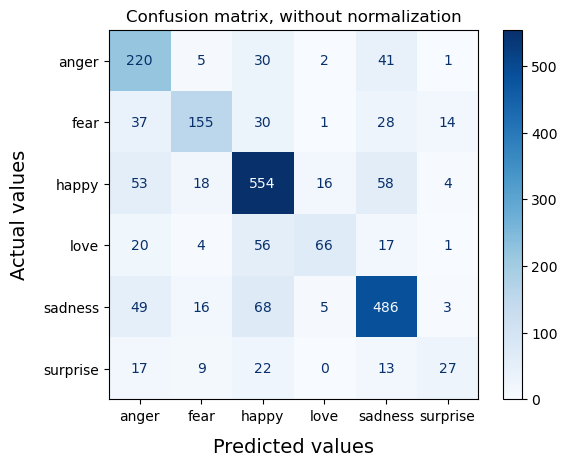

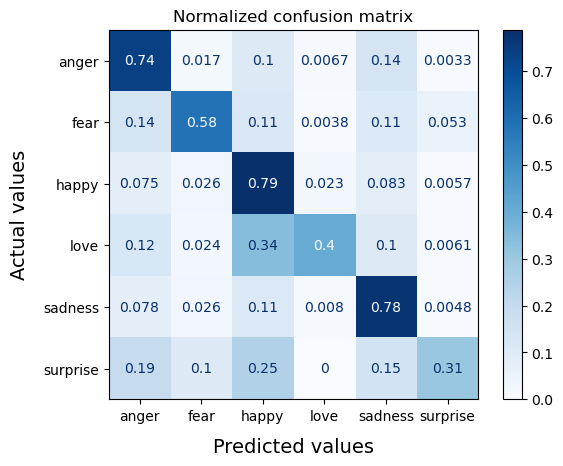

In [26]:
model_Evaluate(classifier_knn)

              precision    recall  f1-score   support

           0       0.91      0.68      0.78       299
           1       0.85      0.65      0.74       265
           2       0.75      0.95      0.84       703
           3       0.87      0.41      0.56       164
           4       0.79      0.92      0.85       627
           5       0.64      0.16      0.25        88

    accuracy                           0.79      2146
   macro avg       0.80      0.63      0.67      2146
weighted avg       0.80      0.79      0.78      2146



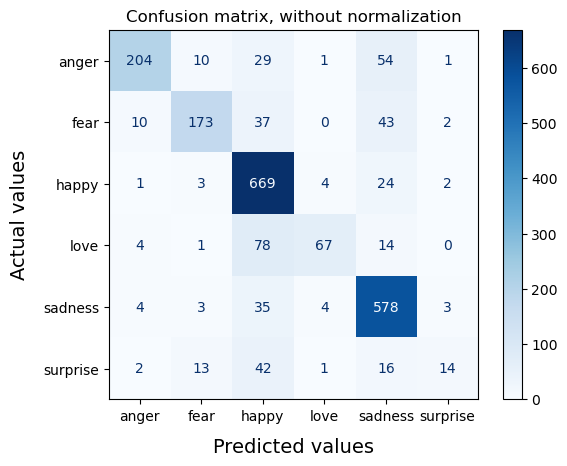

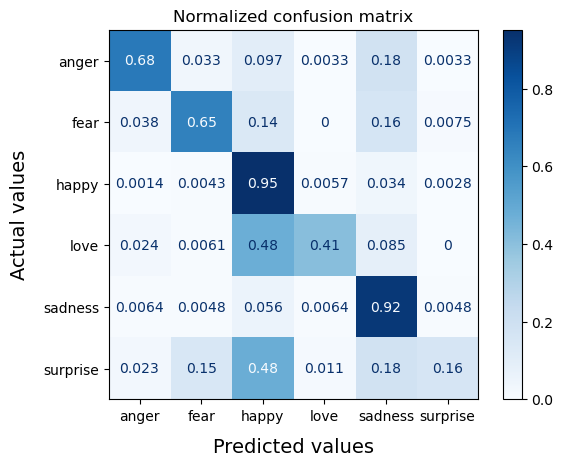

In [27]:
model_Evaluate(classifier_nb)

              precision    recall  f1-score   support

           0       0.91      0.69      0.79       299
           1       0.87      0.73      0.79       265
           2       0.73      0.95      0.83       703
           3       0.90      0.46      0.61       164
           4       0.88      0.89      0.88       627
           5       0.82      0.48      0.60        88

    accuracy                           0.82      2146
   macro avg       0.85      0.70      0.75      2146
weighted avg       0.83      0.82      0.81      2146



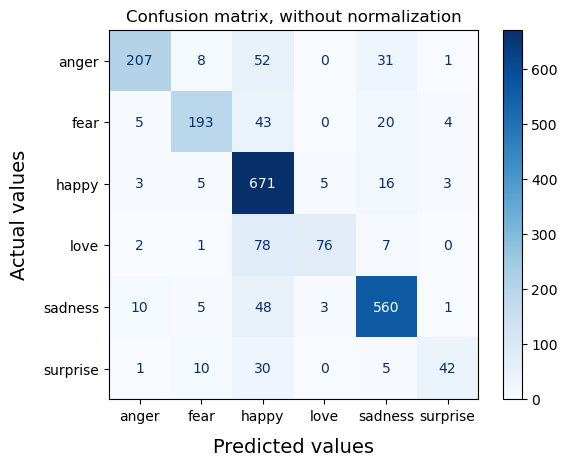

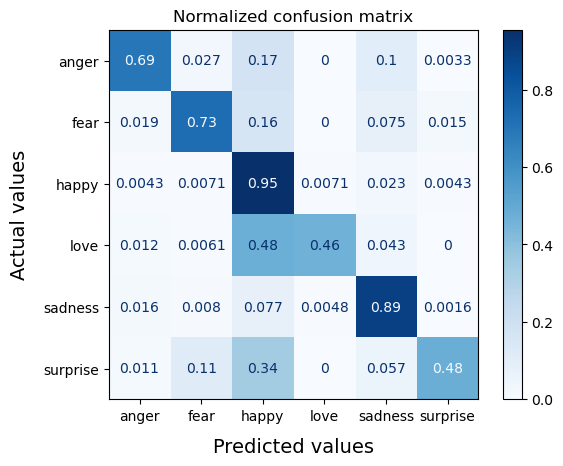

In [28]:
model_Evaluate(classifier_svm_rbf)